<a href="https://colab.research.google.com/github/ArielRoss1605/Simulacion-II/blob/main/MMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Media movil simple.

Es un indicador tecnico mas común de usar y el que mayor se utiliza al iniciar en el mundo del trading.

Su uso es filtrar el ruido del precio y aclarar la tendencia del mercadoocultando los movimientos con poca importancia y deja ver como esta trabajando el mercado en realidad.

Calcula el precio promedio del mercado en un periodo especifico. Así se pueden detectar las tendencias que tiene el mercado y que el inversionista pueda tomar una decision. Es importante aclarar que no predice movimientos.

Unicamente resumen de manera mas clara como se ha ido manejando la empresa, es decir, la tendencia que tiene en el mercado, ya sea bajista o alcista.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN (2).csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-06-16,49.799999,49.987499,49.099998,49.385502,49.385502,229454000\n2017-06-19,50.849998,50.849998,49.494999,49.758499,49.758499,100868000\n2017-06-20,49.900002,50.243999,49.601002,49.629501,49.629501,81536000\n2017-06-21,49.935001,50.136002,49.632500,50.111500,50.111500,58450000\n2017-06-22,50.111500,50.348000,49.860001,50.064999,50.064999,45068000\n2017-06-23,50.126999,50.230999,49.901001,50.187000,50.187000,57582000\n2017-06-26,50.424999,50.490002,49.599998,49.699001,49.699001,67724000\n2017-06-27,49.534500,49.939999,48.799999,48.839001,48.839001,75648000\n2017-06-28,48.927502,49.534000,48.460499,49.516499,49.516499,74752000\n2017-06-29,48.950001,49.377998,48.262501,48.796501,48.796501,86060000\n2017-06-30,49.006001,49.173500,48.380501,48.400002,48.400002,67806000\n2017-07-03,48.639500,48.724499,47.549999,47.682999,47.682999,58182000\n2017-07-05,48.076500,48.750000,47.762501,48.570000,48.570000,73060000\n2017-07-06,48.233

In [67]:
datos = pd.read_csv('AMZN.csv')
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-16,169.600006,171.317505,168.026505,170.762497,170.762497,84056000
1,2021-06-17,170.158997,174.860001,170.050003,174.462006,174.462006,102730000
2,2021-06-18,173.999496,175.350006,173.685501,174.345001,174.345001,104954000
3,2021-06-21,173.820999,174.100006,171.699997,172.697998,172.697998,65542000
4,2021-06-22,172.903000,176.188995,172.804504,175.272003,175.272003,66902000


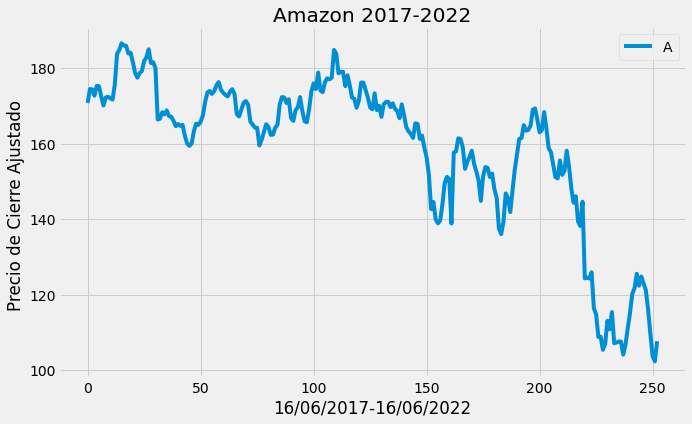

In [68]:
#Graficamos los datos
plt.figure(figsize=(10,6))
plt.plot(datos['Adj Close'],label="AMZN")
plt.title('Amazon 2017-2022')
plt.xlabel('16/06/2017-16/06/2022')
plt.ylabel('Precio de Cierre Ajustado ')
plt.legend('Adj Close')
plt.show()

In [71]:
mms40 = pd.DataFrame()
mms40['Adj Close'] = datos['Adj Close'].rolling(window = 40).mean()
mms40
mms40[mms40.index == 38]
mms40[mms40.index == 39]

,Adj Close
39,175.876875


In [72]:
mms120 = pd.DataFrame()
mms120['Adj Close'] = datos['Adj Close'].rolling(window = 120).mean()
mms120
mms120[mms120.index == 118]
mms120[mms120.index == 119]

,Adj Close
119,172.078204


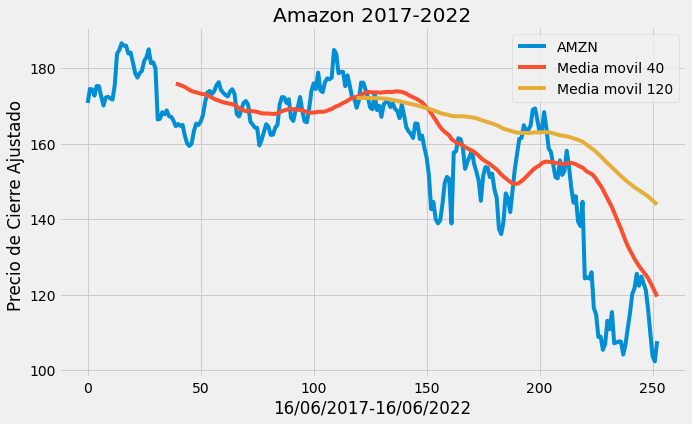

In [73]:
#Graficamos los datos
plt.figure(figsize=(10,6))
plt.plot(datos['Adj Close'],label="AMZN")
plt.plot(mms40['Adj Close'],label='Media movil 40')
plt.plot(mms120['Adj Close'],label='Media movil 120')
plt.title('Amazon 2017-2022')
plt.xlabel('16/06/2017-16/06/2022')
plt.ylabel('Precio de Cierre Ajustado ')
plt.legend(loc='upper right')
plt.show()

In [74]:
data = pd.DataFrame()
data['Amazon'] = datos['Adj Close']
data['Media 40'] = mms40['Adj Close']
data['Media 120'] = mms120['Adj Close']
data

,Amazon,Media 40,Media 120
0,170.762497,NaN,NaN
1,174.462006,NaN,NaN
2,174.345001,NaN,NaN
3,172.697998,NaN,NaN
4,175.272003,NaN,NaN
...,...,...,...
248,116.150002,124.347526,145.977046
249,109.650002,123.200251,145.473983
250,103.669998,121.999338,144.945575
251,102.309998,120.737463,144.378017


In [75]:
def decision(data):
  compra = []
  venta = []
  condicion = 0
  for dia in range(len(data)):

    if data['Media 40'][dia] > data['Media 120'][dia]:
      if condicion != 1: 
        compra.append(data['Amazon'][dia])
        venta.append(np.nan)
        condicion = 1
      else:
        compra.append(np.nan)
        venta.append(np.nan)
    elif data['Media 40'][dia] < data['Media 120'][dia]:
      if condicion != -1:
        venta.append(data['Amazon'][dia])
        compra.append(np.nan)
        condicion = -1
      else:
        compra.append(np.nan)
        venta.append(np.nan)
    else:
      compra.append(np.nan)
      venta.append(np.nan)
  return(compra,venta)

In [76]:
decisiones = decision(data)
data['compra'] = decisiones[0]
data['venta'] = decisiones[1]
data

,Amazon,Media 40,Media 120,compra,venta
0,170.762497,NaN,NaN,NaN,NaN
1,174.462006,NaN,NaN,NaN,NaN
2,174.345001,NaN,NaN,NaN,NaN
3,172.697998,NaN,NaN,NaN,NaN
4,175.272003,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,116.150002,124.347526,145.977046,NaN,NaN
249,109.650002,123.200251,145.473983,NaN,NaN
250,103.669998,121.999338,144.945575,NaN,NaN
251,102.309998,120.737463,144.378017,NaN,NaN


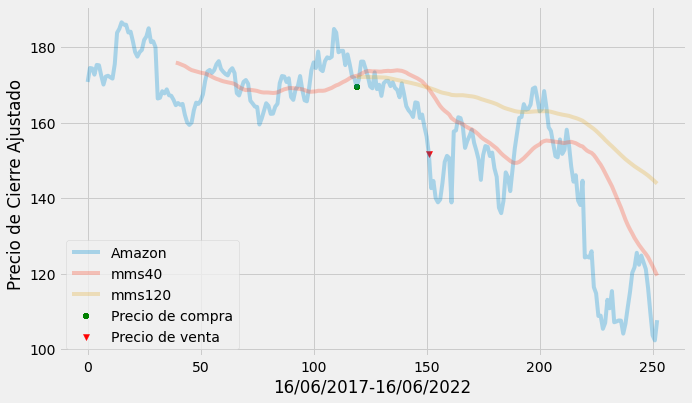

In [77]:
plt.figure(figsize=(10,6))
plt.plot(data['Amazon'], label = 'Amazon', alpha = 0.3)
plt.plot(data['Media 40'],label = 'mms40', alpha = 0.3)
plt.plot(data['Media 120'],label = 'mms120', alpha = 0.3)
plt.scatter(data.index,data['compra'],label='Precio de compra',marker='+',color = 'green')
plt.scatter(data.index,data['venta'],label='Precio de venta',marker='v',color = 'red')
plt.xlabel('16/06/2017-16/06/2022')
plt.ylabel('Precio de Cierre Ajustado ')
plt.legend(loc='lower left')
plt.show()

In [ ]:
]